# Data Preprocessing and Data Loading



The dataset that we chose consists of 20k reviews regarding hotel reviews from Tripadvisor. It is presented in a .csv file containing two columns: 

    Review: contains a review associated to an hotel. It is a string.
    Rating: contains a label indicating the rating assciated to an hotel. The different labels are {1,2,3,4,5}.

Some modifications of the dataset will be needed as well as some NLP techniques which will be useful to agilize the study and reduce the amount of nodes that will be present in our network. At this stage, our aim is to collect and create meaningful  data from the dataset. As we advance through the notebook, we will explain in more detail what we do.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


#### We read our .csv file:

In [79]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


#### Next, we will create an histogram to check how many reviews are associated with the different ratings labels:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D531BE828>]],
      dtype=object)

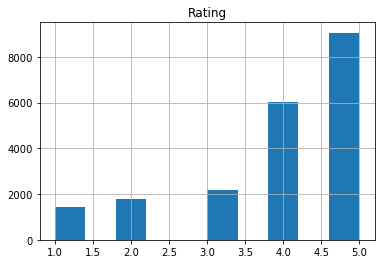

In [80]:
df.hist(column='Rating')

Observe that the ratings are pretty unbalanced as most of the reviews have a label of 4 or 5. As we intend to create a mode able to predict a rating and a sentiment from a review, it would be nice to have a better distribution of the ratings among the reviews. Otherwise, training a model with such an unbalanced data could result in a biased model.

There are different approaches to solve this issue:

    A. One of them could consist in randomly select around 2k reviews labeled with 5 and around 2k reviews labeled with 4. Our model would inmediately stop being unbalanced.
    
    B. The other approach would just consist in just dropping the reviews labeled with 5. Then, group the reviews labeled with 1,2 and 3 and relabel them as bringing a negative sentiment (0) and relabel the reviews labeled with 4 as bringing a positive sentiment (1). This would assure a balanced model for the sentiment training.
   

#### We will choose the approach B.

In [81]:
five_star_ratings_index = df.index[df['Rating']==5].tolist() #select rows labeled with 5

df = df.drop(index=five_star_ratings_index) #drop the rows that we selected
df = df.reset_index()
df = df.drop(columns=['index'])

NUMBER_OF_ROWS = df.shape[0]

df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"excellent staff, housekeeping quality hotel ch...",4
4,"poor value stayed monaco seattle july, nice ho...",2
5,nice value seattle stayed 4 nights late 2007. ...,4
6,nice hotel good location hotel kimpton design ...,4
7,nice hotel not nice staff hotel lovely staff q...,3
8,"great hotel night quick business trip, loved l...",4
9,horrible customer service hotel stay february ...,1


#### We add a sentiment column to our modified dataframe accordingly to the approach B

In [82]:
df_sentiment = pd.DataFrame(data = np.zeros(NUMBER_OF_ROWS), columns=['Sentiment'],dtype='int64') #we create the sentiment column
df_model = pd.concat([df,df_sentiment], axis = 1)

for i in range(NUMBER_OF_ROWS): #we update the sentiment column
  if df_model.at[i,'Rating']==4:
    df_model.at[i,'Sentiment']=1
    
df_model

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"excellent staff, housekeeping quality hotel ch...",4,1
4,"poor value stayed monaco seattle july, nice ho...",2,0
5,nice value seattle stayed 4 nights late 2007. ...,4,1
6,nice hotel good location hotel kimpton design ...,4,1
7,nice hotel not nice staff hotel lovely staff q...,3,0
8,"great hotel night quick business trip, loved l...",4,1
9,horrible customer service hotel stay february ...,1,0


#### We create a histogram on sentiment

We can now observe that we have fitted a pretty balanced model for the sentiment training at this stage. So we have a not biased model! It will be a good model with enough instances of both types 0 and 1 for training!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D53361BE0>]],
      dtype=object)

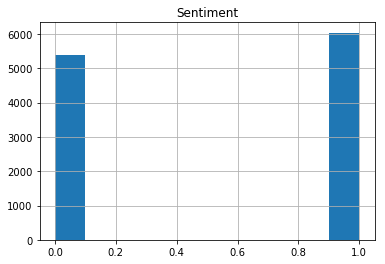

In [83]:
df_model.hist(column='Sentiment')

#### We look for null or na values among our data frame

We don't find any of these values, which shows the correctness of our data so far!

In [84]:
df_model.isnull().any().any().sum() #no null values

0

In [85]:
df_model.isna().sum() #no na values

Review       0
Rating       0
Sentiment    0
dtype: int64

In [86]:
(df_model['Review']=='').sum() #no blank review

0

## We will visualize a bit differently what's inside the data: Pie charts

---



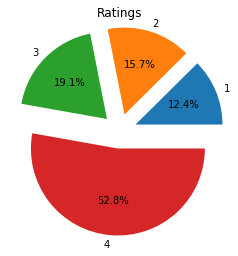

In [87]:
rating_counts = df_model['Rating'].value_counts()
size=[rating_counts.get(1), rating_counts.get(2),rating_counts.get(3), rating_counts.get(4)]
plt.pie(size, labels=['1','2','3','4'], autopct='%1.1f%%', explode=[0.2,0.2,0.2,0.2])
plt.title('Ratings')
plt.show()

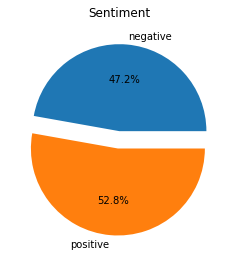

In [88]:
sentiment_counts = df_model['Sentiment'].value_counts()
size=[sentiment_counts.get(0), sentiment_counts.get(1)]
plt.pie(size, labels=['negative', 'positive'], autopct='%1.1f%%', explode=[0,0.2])
plt.title('Sentiment')
plt.show()

# Natural Language processing

## Text pre-processing

We will construct our network consisting of words acting as nodes. The conditions on the edges joining two nodes will be specified later on. 

Therefore, as a starting point we need to identify each review with the words that it contains. This will be achieved by splitting the original string (review) into smaller elements (words) separated by a blank character (' '). As a consequence, we will obtain a list of the words contained in the review. This process is called tokenization and it is a key point in the start of any NLP analysis.

For this, we will use the NLTK library. The method word_tokenize splits a string into alphanumeric values separated by a blank character and punctuation symbols with no need for them to be separated by a blank space.

##### An example of tokenization:

In [89]:
msg = 'We are creating a nice and interesting project. I hope we can obtain a good mark'

word_tokenize(msg.lower())

['we',
 'are',
 'creating',
 'a',
 'nice',
 'and',
 'interesting',
 'project',
 '.',
 'i',
 'hope',
 'we',
 'can',
 'obtain',
 'a',
 'good',
 'mark']

##### Deleting stopwords and punctuation symbols

The next step will be to delete meaningless items who came out of tokenization. We will delete punctuation symbols as well as the so called stopwords. 

Stopwords are those words which do not really provide any relevant information in a message since they are too much present in a language, so including them both in the network and in the training of the model will not bring any improvements nor understanding since they are not really characteristic words of a given sentiment or rating. We do not wish to have such words acting as nodes in our network as they will not bring any meaning and, probably they will induce a more complex network. Those can be words as for example: I, you, and, we, but...

The same happens for punctuation symbols, we do not want any punctuation symbol to play the role of a node in the network nor to train the model.

In [90]:
#Download the lists of stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###### An example of 10 english stopwords :

In [91]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

##### An example of tokenization + deleting stopwords + removing punctuation:

In this example we can already see the effects of our method. We can extract the same understanding out of the clean tokenized message as from the original messsage. This is the kind of meaningful information that we refer to. We delete unnecesary elements with no need to loose meaningless out of a message.


This is the kind of direct data that we would like to have in our network and that will be useful to train our models.

In [92]:
#Delete stopwords
msg = 'We are creating a nice and interesting project. I hope we can obtain a good mark'

words = word_tokenize(msg.lower())
stop_words = set(stopwords.words('english'))

filtered_words = []
for word in words:
    if word not in stop_words and word.isalpha():
        filtered_words.append(word)
        
print(filtered_words)

['creating', 'nice', 'interesting', 'project', 'hope', 'obtain', 'good', 'mark']


### Stemming

A last preprocessing step on the body of every review must be that of stemming. Stemming may refer to reduce a word to its root. This step is indeed very useful and necessary to our purposes. Let us illustrate it with an example:

Imagine we have constructed our network and some of the nodes of our network are: interesting, interest, interested. Then:

    1. It is not computationally efficient to have different nodes assigned to words that provide us with the same meaning.
    
    2. This scenario may increase the complexity of our network.
    
    3. Training a model can be much harder and the resulting model may be way less accurate.
    
The solution is to have a common word (a stem) representing all its variants. In the example: 'interest' would be the stem and therefore 'interest' should be the node appearing in the network representing all of its variants.

There are different stemming algorithms. We will use the Snowball Stemmer as it is not very aggresive on the stemming and we will still need to extract understanding out of the network that we will construct.

In [93]:
#Delete stopwords + Stemming + Remove punctuation:

mag = 'We are creating a nice and interesting project. I hope we can obtain a good mark'

words = word_tokenize(mag.lower())
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

filtered_words = []
for word in words:
    if word not in stop_words and word.isalpha(): #(isalphabet)
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
print(filtered_words)

['creat', 'nice', 'interest', 'project', 'hope', 'obtain', 'good', 'mark']


#### Let us convert all the steps that we took into a function that can be applied to every review of our data frame

In [94]:
def clean_review(review, stemmer = SnowballStemmer('english'), stop_words = set(stopwords.words('english'))):

  words = word_tokenize(review.lower())
  
  filtered_words = []
  for word in words:
      if word not in stop_words and word.isalpha(): #(isalphabet)
          stemmed_word = stemmer.stem(word)
          filtered_words.append(stemmed_word)
  return filtered_words

In [95]:
#An example
clean_review('This is a really nice and interesting project. What do you think?')

['realli', 'nice', 'interest', 'project', 'think']

## Tokenizing and cleaning every review of the data frame

In [96]:
stemmed_nested_list = df_model.Review.apply(clean_review)
print(stemmed_nested_list)

0        [nice, hotel, expens, park, got, good, deal, s...
1        [ok, noth, special, charg, diamond, member, hi...
2        [nice, room, experi, hotel, monaco, seattl, go...
3        [excel, staff, housekeep, qualiti, hotel, choc...
4        [poor, valu, stay, monaco, seattl, juli, nice,...
5        [nice, valu, seattl, stay, night, late, look, ...
6        [nice, hotel, good, locat, hotel, kimpton, des...
7        [nice, hotel, nice, staff, hotel, love, staff,...
8        [great, hotel, night, quick, busi, trip, love,...
9        [horribl, custom, servic, hotel, stay, februar...
10       [disappoint, say, anticip, stay, hotel, monaco...
11       [hmmmmm, say, realli, high, hope, hotel, monac...
12       [good, valu, downtown, hotel, monaco, seattl, ...
13       [great, locat, need, intern, upgrad, advantag,...
14       [mind, nois, place, great, read, review, nois,...
15       [love, stay, warwick, overnight, getway, enjoy...
16       [met, expect, central, locat, hotel, block, wa.

Next, we would like that regardless of the total times that a stem appears such  stem constitutes just one single node in the network. For that we collect the unique words (stems)

In [97]:
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]
unique_words = pd.Series(flat_stemmed_list).value_counts()
NUMBER_OF_UNIQUE_WORDS = len(unique_words)

print('Number of unique words:',len(unique_words), '\n')

print('The next output shows the different unique words (stems) and the total number of corresponding apparitions:')

unique_words

Number of unique words: 25661 

The next output shows the different unique words (stems) and the total number of corresponding apparitions:


room             29485
hotel            29175
stay             15383
good             11338
great            10489
night             8686
staff             8418
nice              8328
day               7920
locat             7655
time              7576
beach             6493
clean             6481
servic            6228
like              6005
food              5893
resort            5870
restaur           5867
walk              5652
place             5582
breakfast         5292
pool              4961
bed               4819
realli            4582
peopl             4320
small             4291
friend            4275
area              4259
got               4184
want              4013
                 ...  
crowed               1
soever               1
pastir               1
waystat              1
cackl                1
clorex               1
drinkpool            1
kanebo               1
catagori             1
freshwat             1
surey                1
appat                1
troubleshoo

### Creation of a vocabulary

We will associate an unique ID to every unique word (stem). We will follow the next logic: the lower the ID of a word is, the more frequently the word appears. E.g, the ID of room would be 0 since is the most frequent word. The Id of hotel would be 1, and so on... This logic will also provide us with a good understanding during the study of the network as it will offer some good functionalities.

In [98]:
dictionary = {}

for i in range(NUMBER_OF_UNIQUE_WORDS):
  dictionary[unique_words.index[i]]=i

Next, we convert every word in each stemmed list corresponding to every review into its word ID. In this sense, the information contained in every stemmed list of words will be represented as a list of the corresponding words ID's

In [99]:
#We convert the words in the stemmed lists to its corresponding word ID's

stemmed_nested_list = stemmed_nested_list.tolist()
stemmed_nested_list_IDs = []

for sublist in stemmed_nested_list:
  sublist_ID=[]
  for element in sublist:
    sublist_ID.append(dictionary[element])
  stemmed_nested_list_IDs.append(sublist_ID)



print('An example: The first review would be represented as follows')

stemmed_nested_list_IDs[0]

An example: The first review would be represented as follows


[7,
 1,
 163,
 86,
 28,
 3,
 192,
 2,
 1,
 1074,
 53,
 209,
 185,
 110,
 728,
 377,
 50,
 631,
 86,
 42,
 250,
 190,
 32,
 146,
 46,
 0,
 0,
 12,
 7,
 150,
 22,
 69,
 1506,
 3733,
 3369,
 132,
 415,
 1849,
 14,
 421,
 406,
 0,
 5,
 87,
 400,
 1342,
 79,
 92,
 73,
 299,
 24,
 403,
 656,
 381,
 289,
 1394,
 2786,
 313,
 1286,
 7,
 5435,
 2,
 7,
 497,
 452,
 948,
 2,
 794,
 9,
 4,
 18,
 244,
 84,
 127,
 7,
 95,
 104,
 86,
 5]

### Creation of the data frames for the construction of the network and the training of the models

This next data frame will consist of 11437 rows each of which corresponding to a review and 25660 columns each of which corresponding to a unique word ID.

The data frame will be filled following the next logic:

    -The entry [i,j] will be marked as 1 if the word with ID equal to j is present in the review i.
    
    -The entry [i,j] will be marked as 0 if the word with ID equal to j is NOT present in the review i.
    
Notice how entries corresponding to first columns are usually marked with 1's and entries corresponding to last columns are marked with 0's. This is due to how we constructed our vocabulary and the corresponding ID's. We recall that the more frequently a word appears, the lower the ID is. This results very convenient since if we intend to do some reduction of the data frame we can just drop the n-th last columns without assuming the risk of loosing very meaningful data.

In [100]:
NUMBER_OF_ROWS = NUMBER_OF_ROWS #number of reviews
NUMBER_OF_COLS = NUMBER_OF_UNIQUE_WORDS #number of unique words

df_words = pd.DataFrame(np.zeros((NUMBER_OF_ROWS, NUMBER_OF_COLS)),dtype ='int64')

row = 0
for lista in stemmed_nested_list_IDs:
  for elemento in lista:
    df_words.at[row,elemento] =1
  row+=1

df_words

,0,1,2,3,4,5,6,7,8,9,...,25651,25652,25653,25654,25655,25656,25657,25658,25659,25660
0,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### At this point, it is missing to introduce the rating labels and sentiment labels in our dataframe

For this, we will create two different dataframes:

    df_model_sentiment -> It will contain all the preprocessed information for every review and the corresponding sentiment labels.
    
    df_model_rating -> It will contain all the preprocessed information for every review and the corresponding rating label.

In [101]:
df_model_sentiment = pd.concat([df_model.loc[:,['Sentiment']],df_words], axis = 1)
df_model_sentiment

,Sentiment,0,1,2,3,4,5,6,7,8,...,25651,25652,25653,25654,25655,25656,25657,25658,25659,25660
0,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_model_rating = pd.concat([df_model.loc[:,['Rating']],df_words], axis = 1)
df_model_rating

,Rating,0,1,2,3,4,5,6,7,8,...,25651,25652,25653,25654,25655,25656,25657,25658,25659,25660
0,4,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,4,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,4,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reduction and shuffling of the dataframes

Out of both dataframes that we have just constructed we'd like to reduce the dimensionality as both of them have 11.437 x 25.660 entries, which makes them extremely large dataframes. There are some inconvenients about working with these large dataframes: it may require a big amount of time to train the models and to construct the network. Also we risk having a big amount of nodes in our network (25.660) in such a way that it could result in a very difficult task to understand the information underlying in the network.

The way to overcome the problem is not that difficult in our case. Thanks to the structure of our vocabulary, we know that the most influent words are those who have a lower index. So, in case we want to reduce the number of nodes and don't loose any important information, we can just disregard columns sitting at the end of the dataframes. Indeed, most of them will be essentially constituted of 0's. In this way, all the important and meaningful information will continue being stored and the size of the dataframes will be considerably reduced.

For that, we will select the first 5.000 columns of each dataframe (we have already checked that this selection leads to very good results in the performance of the models) and we will randomly sample 10.000 rows out of each dataframe. The sampling step is done to eliminate any existing pattern in the ordering of the labels so that when we train our models they are unable to detect this pattern and use it to predict the labels. That's why we prefer to do sampling over selecting the first 10.000 rows.

In conclusion, the resulting dataframes would have a size of 10.000 x 5.000:

    df_model_sentiment_large
    
    df_model_rating_large

In [103]:
#We will use the next dataframe for sentiment:

df_model_sentiment_large = df_model_sentiment.sample(n=10000, axis=0) #sampling
df_model_sentiment_large = df_model_sentiment_large.iloc[:, :5000] #selecting first 5000 columns

#A smaller model for sentiment:

#df_model_sentiment_reduced = df_model_sentiment.sample(n=3000, axis=0) #sampling
#df_model_sentiment_reduced = df_model_sentiment_reduced.iloc[:, :1000] #selecting first 1000 columns




#We will use the next dataframe for rating:

df_model_rating_large = df_model_rating.sample(n=10000, axis=0) #sampling
df_model_rating_large = df_model_rating_large.iloc[:, :5000] #selecting first 5000 columns

#A smaller model for rating:

#df_model_rating_reduced = df_model_rating.sample(n=3000, axis=0) #sampling
#df_model_rating_reduced = df_model_rating_reduced.iloc[:, :1000] #selecting first 1000

In [104]:
print('The dataframe that we will use for sentiment is the following:')
df_model_sentiment_large

The dataframe that we will use for sentiment is the following:


,Sentiment,0,1,2,3,4,5,6,7,8,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
164,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2588,1,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1885,0,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8455,1,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8489,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10941,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4174,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4740,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1033,1,1,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [105]:
print('The dataframe that we will use for rating is the following:')
df_model_rating_large

The dataframe that we will use for rating is the following:


,Rating,0,1,2,3,4,5,6,7,8,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
11342,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
132,2,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5597,3,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8132,2,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
965,4,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10902,3,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7418,4,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8627,2,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10718,4,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10487,4,0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Download the models

Uncomment the next cell to download the dataframes that we will be working with

In [106]:
#df_model_sentiment_large.to_csv('sentiment_large.csv', encoding = 'utf-8-sig')

#df_model_rating_large.to_csv('rating_large.csv', encoding = 'utf-8-sig')

# Creation of the models for the prediction of rating and sentiment

We will create a pytorch neural network for both rating and sentiment prediction. The characteristics of such networks will be exposed later.

#### Importing libraries

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import seaborn as sns

import pandas as pd

## Model for sentiment

We have tested that selecting the first 2.500 columns of the dataframe offer the same performance. Same results and less complex!

In [108]:
df_sentiment = pd.read_csv('sentiment_large.csv')
df_sentiment = df_sentiment.drop(columns='Unnamed: 0')
df_sentiment = df_sentiment.iloc[:,:2501] #selecting first 2500 columns containing information about words

In [109]:
y = torch.tensor(df_sentiment['Sentiment'].values).flatten() #convert the label into a tensor

In [110]:
X = np.stack([df_sentiment.iloc[:,i].values for i in range(1,2501)], 1) 
X = torch.tensor(X, dtype=torch.float) #convert the data determining the labels into a tensor

### Perform train/test splits

As our tensors have already been shuffled when the creation of the dataframes that we are dealing with, there is no need to shuffle them again for the training and testing of the models. We pick the first 8000 rows for training and the last 2000 rows for testing. I.e, 20% of the available data will be used for testing.

It is very important to split the data into training and testing data, since testing data (which will assert the quality of the model) is data that the model has never seen before.

In [111]:
full_size = 10000 #includes test+train
test_size = 2000

X_train = X[:full_size-test_size]
X_test = X[full_size-test_size:full_size]
y_train = y[:full_size-test_size]
y_test = y[full_size-test_size:full_size]

In [112]:
len(X_train)

8000

In [113]:
len(X_test)

2000

In [114]:
X_train.shape

torch.Size([8000, 2500])

### Create the model

We will create a fully connected (deep) artificial neural network. There will be two hidden layers of respectively 120 and 84 neurons. The input size is the number of features, i.e 2.500. The output size is the number of labels, i.e 2.

Also, in order to avoid our model to learn by heart, we will use a dropout layer after each internal layer, which have a probability of 50% to randomly switch off neurons. 

We will be using a rectified linear unit activation function (relu) for the internal layers and a softmax activation function in the output step.

In [115]:
class MultilayerPerceptron(nn.Module): #inherits from nn.Module
    def __init__(self, in_sz=2500, out_sz=2, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        self.drop = nn.Dropout(0.5)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.drop(X)
        X = F.relu(self.fc2(X))
        X = self.drop(X)
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101) #set a seed for reproducibility
model_sentiment_torch = MultilayerPerceptron()

print('The different type of layers that our model will have are:')
model_sentiment_torch

The different type of layers that our model will have are:


MultilayerPerceptron(
  (fc1): Linear(in_features=2500, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
  (drop): Dropout(p=0.5)
)

As our model needs to choose between two labels, it will be suitable to use cross entropy loss function as criterion for the performance. It measures the performance of a classification model whose output is a probability value between 0 and 1.

In [116]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_sentiment_torch.parameters(), lr=0.001)

## Train the model

By changing the parameters responsible for the quality of the resulting model we have remarked that doing 27 epochs was leading to a very good performance. Indeed, we were able to train the model in just 8 seconds and we obtained an accuracy of 82% on the testing data. They are indeed very good results.

In [117]:
import time
start_time = time.time()

epochs = 27 #number of times we go through the training data
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_sentiment_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_sentiment_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)


print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.69234240
epoch:   2  loss: 0.68653339
epoch:   3  loss: 0.68072969
epoch:   4  loss: 0.67221749
epoch:   5  loss: 0.66086990
epoch:   6  loss: 0.64735961
epoch:   7  loss: 0.63245028
epoch:   8  loss: 0.61211574
epoch:   9  loss: 0.59749675
epoch:  10  loss: 0.57556856
epoch:  11  loss: 0.55671322
epoch:  12  loss: 0.53886873
epoch:  13  loss: 0.51399261
epoch:  14  loss: 0.49657136
epoch:  15  loss: 0.47353503
epoch:  16  loss: 0.45716053
epoch:  17  loss: 0.44404647
epoch:  18  loss: 0.42750117
epoch:  19  loss: 0.41555271
epoch:  20  loss: 0.40254098
epoch:  21  loss: 0.39390582
epoch:  22  loss: 0.38505939
epoch:  23  loss: 0.38011971
epoch:  24  loss: 0.36074850
epoch:  25  loss: 0.35694453
epoch:  26  loss: 0.34781450
epoch:  27  loss: 0.34286925

Duration: 8 seconds


## Validate the model

Text(0.5, 1.0, 'Loss vs Epochs')

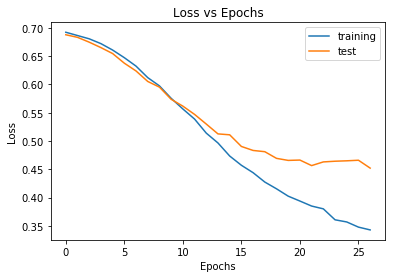

In [118]:
plt.plot(range(epochs),losses, label ='training')
plt.plot(range(epochs), test_losses, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

Accuracy on test data is:  0.82


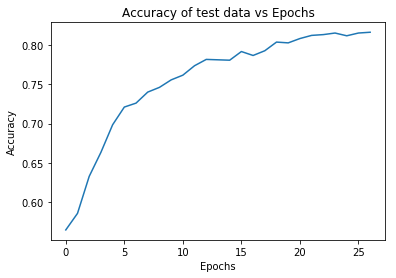

In [119]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of test data vs Epochs')

print("Accuracy on test data is: ", "{:.2f}".format(test_correct_percentage[-1].item()))

### Confusion matrix for test data

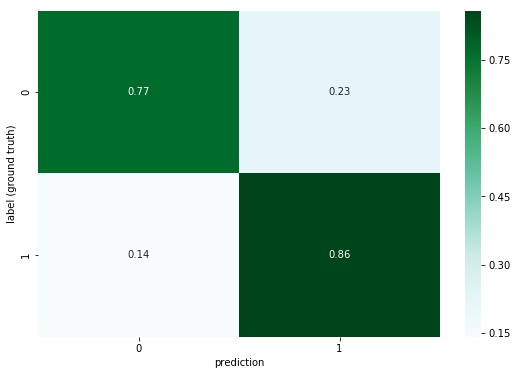

In [120]:
cm = confusion_matrix(y_test.view(-1), predicted.view(-1))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize = (9,6))
sns.heatmap(cmn, annot=True, cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

Concluding, we have been able to train a very good sentiment predictor. This also outlines the quality of our preprocessing steps.

## Model for rating

We have tested that selecting the first 2.500 columns of the dataframe offer the same performance. Same results and less complex!

In [121]:
df_rating = pd.read_csv('rating_large.csv')
df_rating = df_rating.drop(columns='Unnamed: 0')
df_rating = df_rating.iloc[:,:2501] #selecting first 2500 columns containing information about words

In [122]:
y = torch.tensor(df_rating['Rating'].values).flatten() #convert the labes into a tensor
y = y-1 #as we have four labels {1,2,3,4} and so, four possible outcomes of our model we need to relabel them to {0,1,2,3}
#for our model to understand what's going on

In [123]:
X = np.stack([df_rating.iloc[:,i].values for i in range(1,2501)], 1)
X = torch.tensor(X, dtype=torch.float) #convert the data determining the labels into a tensor

### Perform train/test splits

We pick the first 8000 rows for training and the last 2000 rows for testing. I.e, 20% of the available data will be used for testing.

It is very important to split the data into training and testing data, since testing data (which will assert the quality of the model) is data that the model has never seen before.

In [124]:
full_size = 10000 #includes test+train
test_size = 2000

X_train = X[:full_size-test_size]
X_test = X[full_size-test_size:full_size]
y_train = y[:full_size-test_size]
y_test = y[full_size-test_size:full_size]

In [125]:
X_train.shape

torch.Size([8000, 2500])

### Create the model

We will create a fully connected (deep) artificial neural network. There will be two hidden layers of respectively 168 and 84 neurons. The input size is the number of features, i.e 2.500. The output size is the number of labels, i.e 4.

We will be using a rectified linear unit activation function (relu) for the internal layers and a softmax activation function in the output step.

In [126]:
class MultilayerPerceptron(nn.Module): #inheriths from nn.Module
    def __init__(self, in_sz=2500, out_sz=4, layers=[168,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        self.drop = nn.Dropout(0.05)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.drop(X)
        X = F.relu(self.fc2(X))
        X = self.drop(X)
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

    
torch.manual_seed(101) #set seed for reproducibility
model_rating_torch = MultilayerPerceptron()

print('The different type of layers that our model will have are:')
model_rating_torch

The different type of layers that our model will have are:


MultilayerPerceptron(
  (fc1): Linear(in_features=2500, out_features=168, bias=True)
  (fc2): Linear(in_features=168, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
  (drop): Dropout(p=0.05)
)

As our model needs to choose between four labels, it will be suitable to use cross entropy loss function as criterion for the performance. It measures the performance of a classification model whose output is a probability value between 0 and 1.

In [127]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rating_torch.parameters(), lr=0.001)

## Train the model

By changing the parameters responsible for the quality of the resulting model we have remarked that doing 40 epochs was leading to a very good performance. Indeed, we were able to train the model in just ?????? seconds and we obtained an accuracy of almost 70% on the testing data. They are indeed very good results taking into account that the model is deciding among 4 different labels. Think that even for a human it would be difficult to assert the correct rating label by just reading a review.

In [128]:
import time
start_time = time.time()

epochs = 40 #number of times the model goes through the training data
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_rating_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_rating_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)



print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 1.35244215
epoch:   2  loss: 1.32474506
epoch:   3  loss: 1.29675448
epoch:   4  loss: 1.26899564
epoch:   5  loss: 1.24575305
epoch:   6  loss: 1.22602403
epoch:   7  loss: 1.21281052
epoch:   8  loss: 1.19983625
epoch:   9  loss: 1.18515646
epoch:  10  loss: 1.16491389
epoch:  11  loss: 1.14199686
epoch:  12  loss: 1.11789608
epoch:  13  loss: 1.09451008
epoch:  14  loss: 1.07131875
epoch:  15  loss: 1.05023575
epoch:  16  loss: 1.02806246
epoch:  17  loss: 1.00703609
epoch:  18  loss: 0.98455381
epoch:  19  loss: 0.96428412
epoch:  20  loss: 0.94617838
epoch:  21  loss: 0.92928159
epoch:  22  loss: 0.91375911
epoch:  23  loss: 0.89730716
epoch:  24  loss: 0.88087380
epoch:  25  loss: 0.86436474
epoch:  26  loss: 0.84945560
epoch:  27  loss: 0.83388013
epoch:  28  loss: 0.81697512
epoch:  29  loss: 0.80122668
epoch:  30  loss: 0.78298652
epoch:  31  loss: 0.76757085
epoch:  32  loss: 0.75206476
epoch:  33  loss: 0.73483413
epoch:  34  loss: 0.71911252
epoch:  35  lo

## Validate the model

Text(0.5, 1.0, 'Loss vs Epochs')

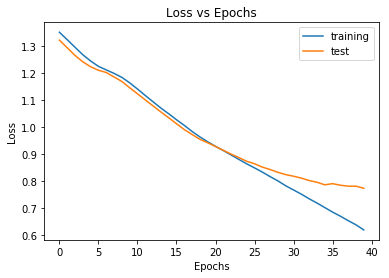

In [129]:
plt.plot(range(epochs),losses, label ='training')
plt.plot(range(epochs), test_losses, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

Accuracy on test data is:  0.69


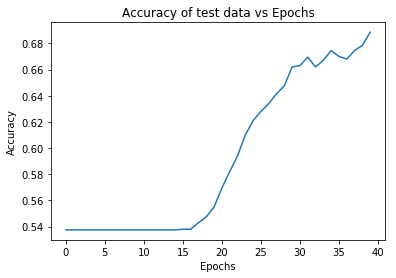

In [130]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of test data vs Epochs')

print("Accuracy on test data is: ", "{:.2f}".format(test_correct_percentage[-1].item()))

### Confusion matrix for test data

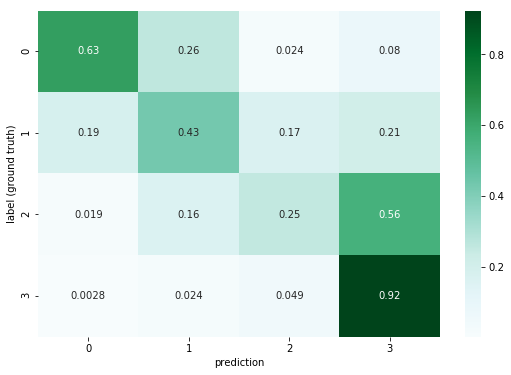

In [131]:
cm = confusion_matrix(y_test.view(-1), predicted.view(-1))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize = (9,6))
sns.heatmap(cmn, annot=True, cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

Concluding, we are more than satisfied with these results as we thought that we would not be so nice. Again, this also outlines the quality of our preprocessing steps.